In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

### Desired Distribution
Let $P(x) = 3e^{-\frac{x^2}{2}} + e^{-\frac{(x-4)^2}{2}}$ be the distribution we want to sample from. Note that this is an unnormalized distribution with a normalizing constant $Z$ we can compute but let's keep it as it is.     
($Z \approx 10.0261955464$)

In [2]:
P = lambda x: 3 * np.exp(-x*x/2) + np.exp(-(x - 4)**2/2)
Z = 10.0261955464

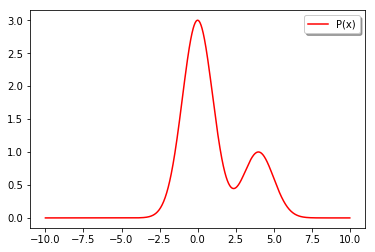

In [3]:
x_vals = np.linspace(-10, 10, 1000)
y_vals = P(x_vals)
plt.figure(1)
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

Let the functions that we want to approximate be $f(x) = x$ and $g(x) = \sin(x)$. The two values for a unnormalized $P$ are as follows:
* $\mathbb{E}[x] \approx 10.02686647165 $
* $\mathbb{E}[\sin(x)] \approx -1.15088010640 $

In [4]:
f_x = lambda x: x
g_x = lambda x: np.sin(x)
true_expected_fx = 10.02686647165
true_expected_gx = -1.15088010640

### Rejection Sampling
For a $cQ(x) > P(x)\,\,\forall\,\,x \in \mathbb{R}$, the rejection sampling can be done as follows.
* Sample $x_i \sim Q(x)$
* Sample $k_i \sim\mathit{Uniform}[0, cQ(x_i)]$
* Accept $x_i$ if $k_i < P(x_i)$    
Note: An accepted $x_i$ is automatically sampled from a normalized $P(x)$.    
In the following code $Q = \mathcal{N}(1,4^2)$

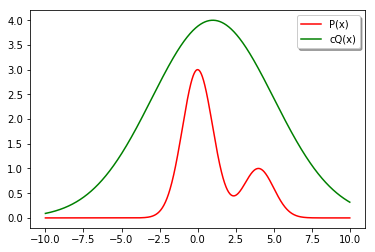

In [5]:
cQ = lambda x: 4 * np.exp(-(x-1)**2/(2.*16))
plt.figure(3)
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.plot(x_vals, cQ(x_vals), 'g', label='cQ(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [6]:
expected_f_x = 0.
expected_g_x = 0.
n_samples = 100000
samples = []
for i in range(n_samples):
    sample = np.random.normal(1, 4)
    P_x = P(sample)
    bent_coin = np.random.uniform(0, cQ(sample))
    if bent_coin < P_x:
        samples.append(sample)
expected_f_x = np.mean(f_x(samples))
expected_g_x = np.mean(g_x(samples))
expected_f_x *= Z
expected_g_x *= Z
print('E[f(x)] = %.5f, Error = %.5f' % (expected_f_x, abs(expected_f_x - true_expected_fx)))
print('E[g(x)] = %.5f, Error = %.5f' % (expected_g_x, abs(expected_g_x - true_expected_gx)))

E[f(x)] = 9.99868, Error = 0.02819
E[g(x)] = -1.19557, Error = 0.04469


Compute the histogram of samples from Rejection Sampling and compare it with normalized $P(x)$. It's clear that rejection sampling generates samples from underlying normalized $P(x)$.

/home/abdul/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


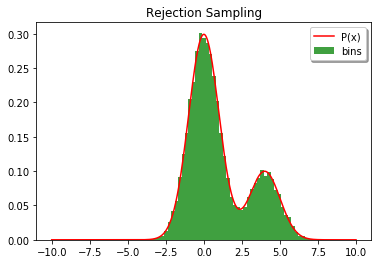

In [7]:
plt.hist(samples, bins=50, histtype='bar', facecolor='g', alpha=0.75, normed=1, label='bins')
plt.plot(x_vals, y_vals/Z, 'r', label='P(x)')
plt.title('Rejection Sampling')
plt.legend(loc='upper right', shadow=True)
plt.show()